# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


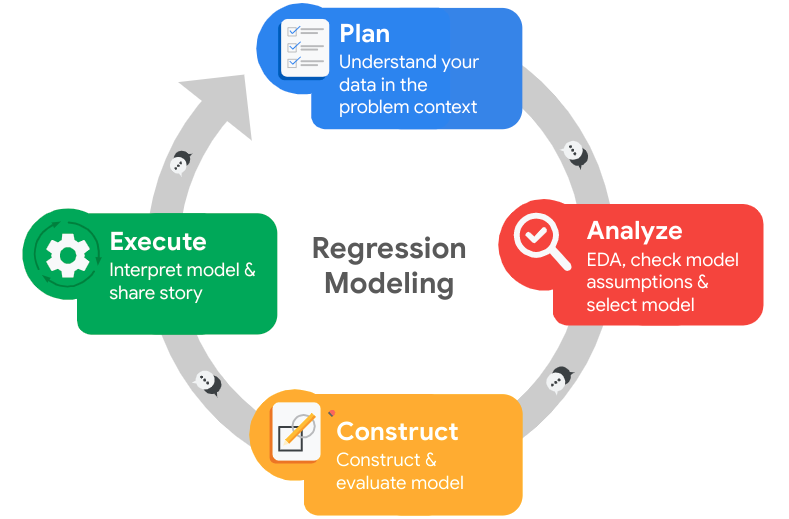

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns = ['satisLevel', 'lastEval', 'numProject',
       'avgMonthHour', 'tenure', 'workAccident', 'left',
       'promoLast5y', 'dept', 'salary']

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###


# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisLevel      0
lastEval        0
numProject      0
avgMonthHour    0
tenure          0
workAccident    0
left            0
promoLast5y     0
dept            0
salary          0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1[df1.duplicated()]

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary


In [11]:
df0['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [12]:
df0['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Check outliers

Check for outliers in the data.

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

df1[df1['tenure'] > (df1['tenure'].std() * 3)].shape[0] 

3891

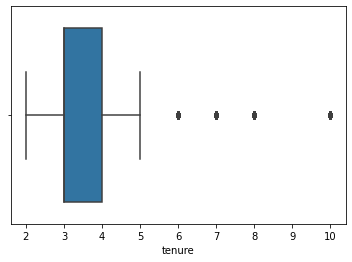

In [14]:
import seaborn as sns

sns.boxplot(data=df1, x='tenure')

In [15]:
df1[df1['tenure'] >= 6] #824 rows are tenures above 6 years

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [16]:
df1['tenure'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [17]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

df1['tenure'].mean()
df1[df1['tenure'] > (df1['tenure'].std() * 3)].shape[0] 

3891

In [18]:
df1.shape

(11991, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

df1['left'].value_counts() #about 1900 left, the rest stayed.

0    10000
1     1991
Name: left, dtype: int64

In [20]:
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1.groupby('left').mean() 

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,promoLast5y
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


> 1. Those who left showed clearly lower satisfaction level. 
2. Their evaluation scores were slightly higher than those who stayed.
3. Those who left worked a slightly higher number of projects, compared to those who stayed.
4. Employees who left worked longer in the company - about 0.6 year (little more than six months)
5. Those who left had much less work accident. 
6. They were not recognized through promotion. 


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [21]:
df1.head()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


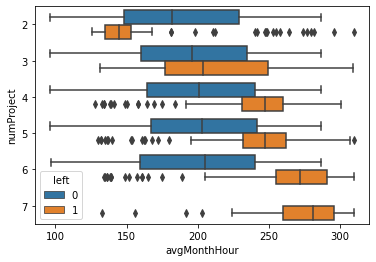

In [22]:
import matplotlib.pyplot as plt
plt.figsize = (20, 12)
sns.boxplot(data=df1, x='avgMonthHour', y='numProject', hue='left', orient="h")

Insights:

1. People in this dataset shows the monthly work hour of 96 - 310. The typical monthly work hour should be 40 * 52 / 12 = 173 hours. About 65% of people here in this dataset showed monthly workhour above 173, meaning more than half the workforce in the dataset were overworking. 

2. Project numbers vary from 2 to 7. People who worked on 2 projects also recorded a higher amount of monthly workhour (many outliers), meaning the project size could differ. So just because working on a lesser number of projects does not mean the person was working less. 

3. Given the number of people who left, the good number of projects they should be assigned with seems to be 3 projects. 

4. People who worked on 7 projects all left the company. Seems they left due to the extremely high workhour. 

In [23]:
df1['avgMonthHour'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: avgMonthHour, dtype: float64

In [24]:
df1[df1['avgMonthHour'] >= 173].shape[0] / df1.shape[0]

0.6541572846301392

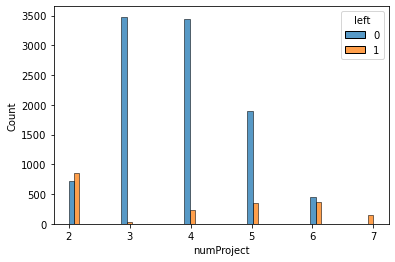

In [25]:
sns.histplot(data=df1, x='numProject', hue='left', multiple='dodge')

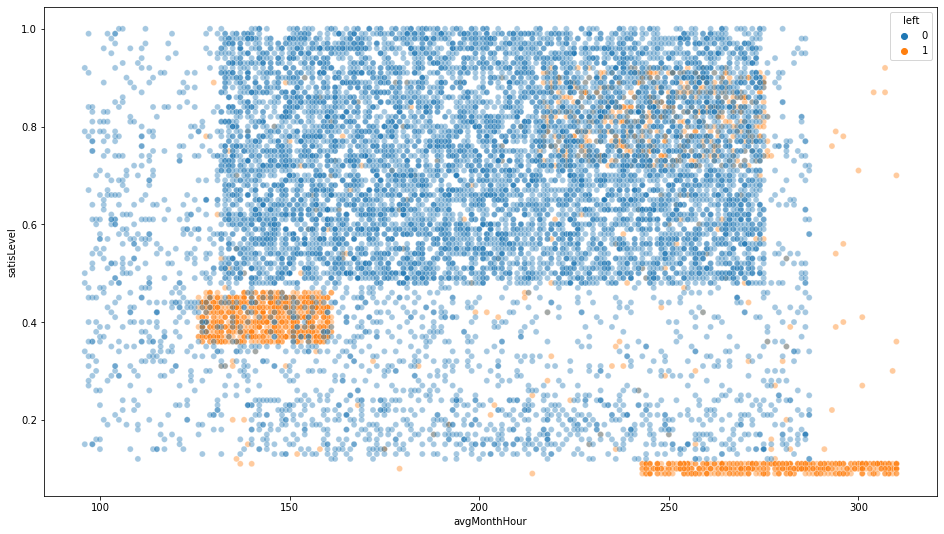

In [26]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avgMonthHour', y='satisLevel', hue='left', alpha=0.4)

Insights: 
    
> 1. Looking at the people who worked about 250-310 hours per month, it's not surprising their satisfaction level is close to zero. 
> 2. There's another dissatisfied group around 150 monthly workhour. It's not clear that why those who work reasonably hours are not satisfied with the company. 
> 3. There are also a group of people who work long hours but still happy with the company. 
> 4. Given the shape in the visualization, it is possible the dataset was artificially manipulated or synthesized. 

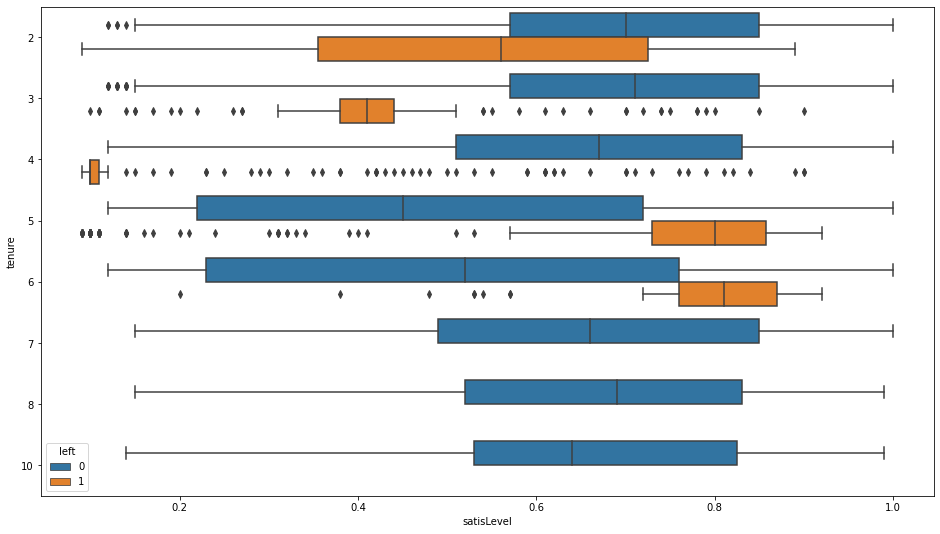

In [27]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='satisLevel', y='tenure', hue='left', orient='h')

In [28]:
df1[(df1['tenure'] == 4) & (df1['satisLevel'] <= 0.2)]

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
6,0.10,0.77,6,247,4,0,1,0,sales,low
11,0.11,0.81,6,305,4,0,1,0,sales,low
20,0.11,0.83,6,282,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11005,0.19,0.83,5,280,4,0,0,0,RandD,low
11069,0.14,0.56,5,259,4,1,0,0,IT,low
11394,0.14,0.79,5,271,4,0,0,0,management,high
11400,0.15,0.75,3,150,4,0,0,1,accounting,medium


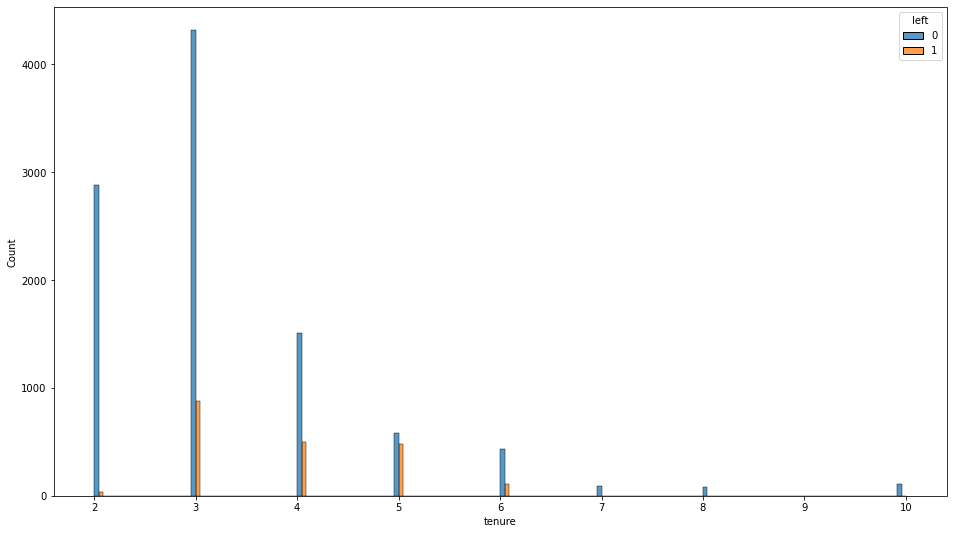

In [29]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge')

Insights: 
    
> 1. (People with a short tenure & dissatisfied with the company) vs. (People with a medium-length tenure & satisfied with the company) 

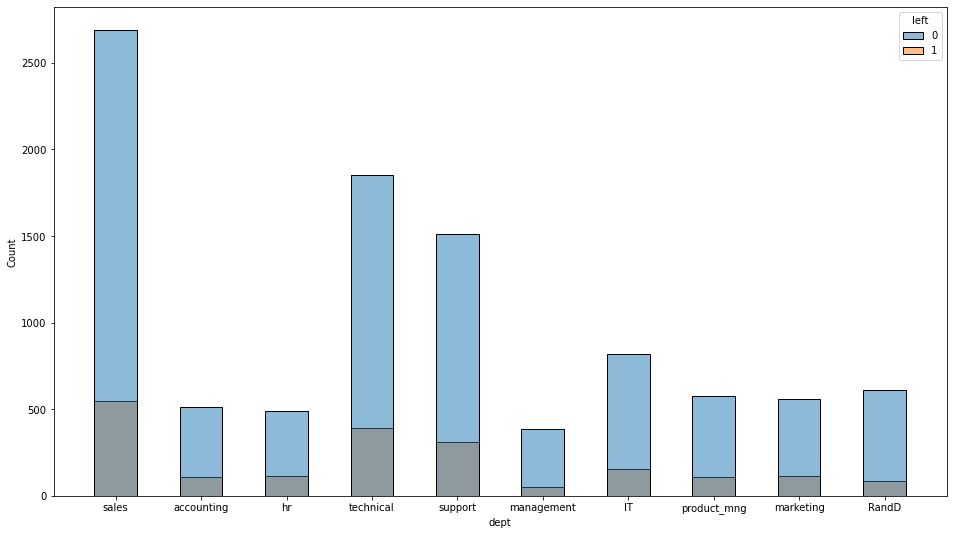

In [30]:
plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x='dept', hue='left', discrete=1, 
             hue_order=[0, 1], shrink = 0.5)

In [31]:
df1.corr()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y
satisLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEval,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numProject,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthHour,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promoLast5y,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


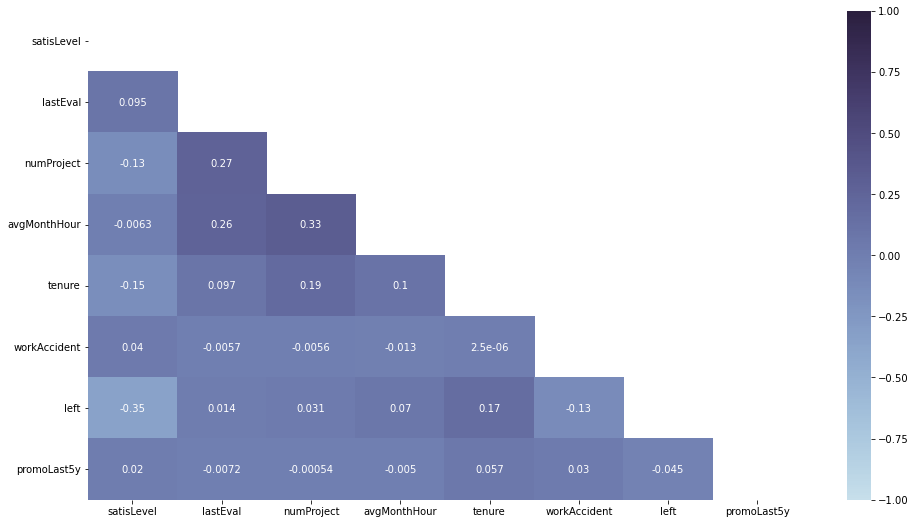

In [32]:
plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))

Insights: 
    
> 1. The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

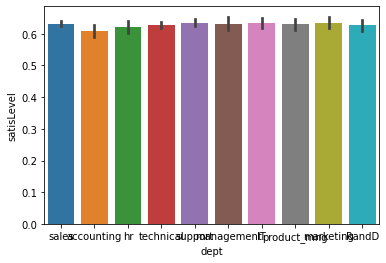

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='dept', y='satisLevel')


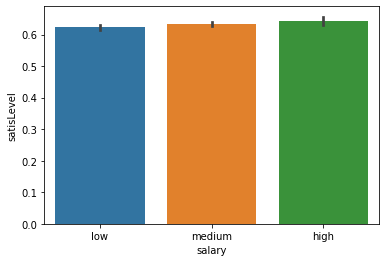

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='salary', y='satisLevel')

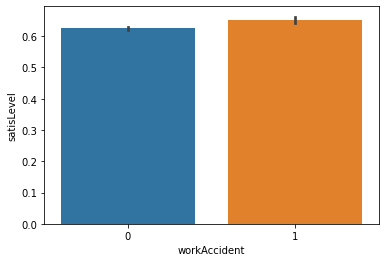

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='workAccident', y='satisLevel')

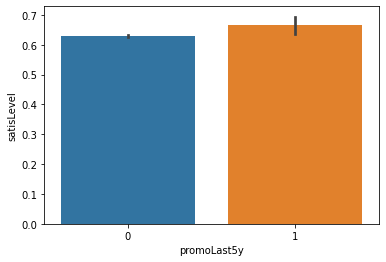

In [36]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.barplot(data=df1, x='promoLast5y', y='satisLevel')

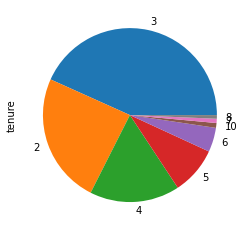

In [37]:
# Create a plot as needed
### YOUR CODE HERE ###
df1['tenure'].value_counts().plot.pie()

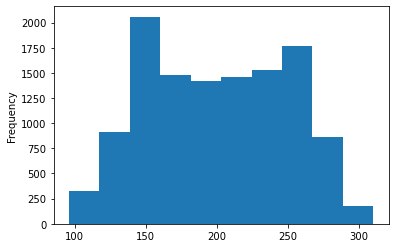

In [38]:
# Create a plot as needed
### YOUR CODE HERE ###
df1['avgMonthHour'].plot.hist()

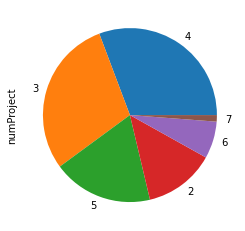

In [39]:
# Create a plot as needed
### YOUR CODE HERE ###
df1['numProject'].value_counts().plot.pie()

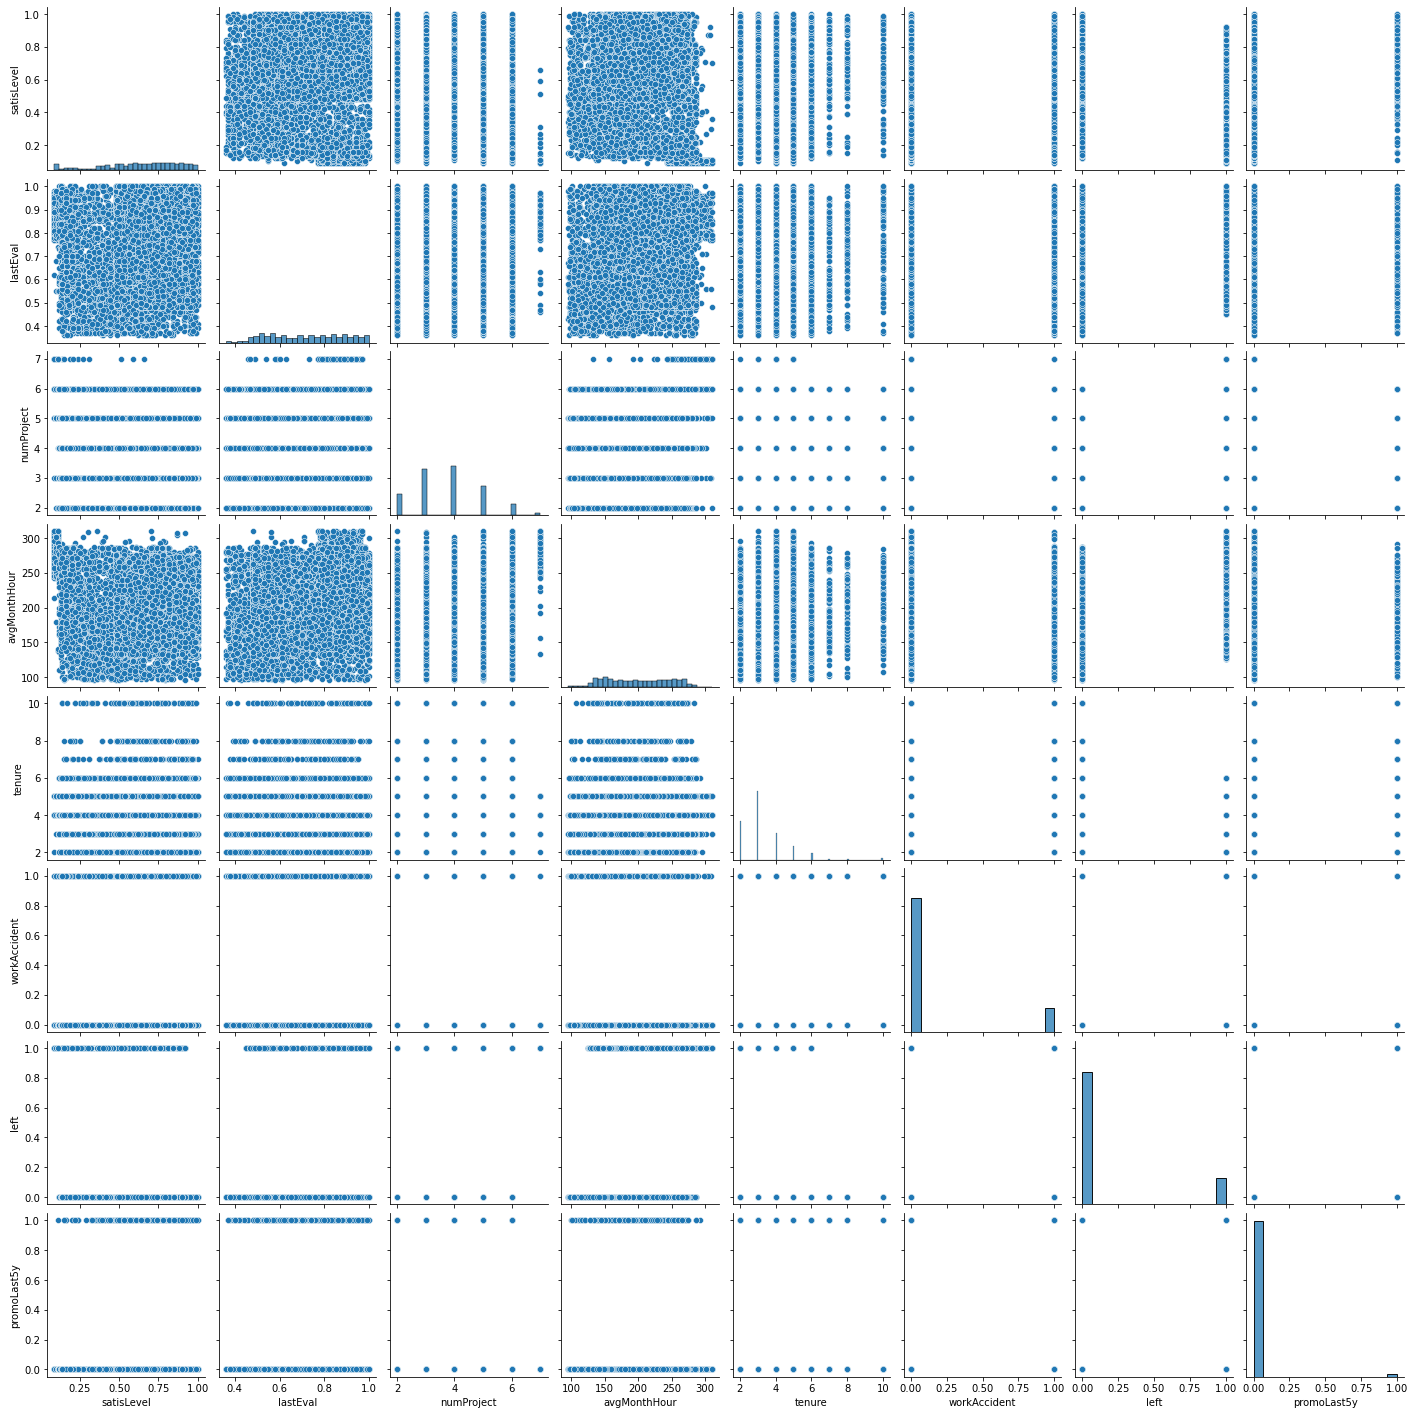

In [40]:
# Create a plot as needed
### YOUR CODE HERE ###
#sns.pairplot(data=df1)

In [41]:
df1.head()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
df1.groupby('salary').mean()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y
salary,,,,,,,,
high,0.643343,0.706838,3.791919,200.067677,3.493939,0.157576,0.048485,0.044444
low,0.622655,0.718512,3.801742,200.439199,3.319686,0.154878,0.204530,0.006620
medium,0.634723,0.716539,3.806121,200.587341,3.389850,0.153013,0.146170,0.022999


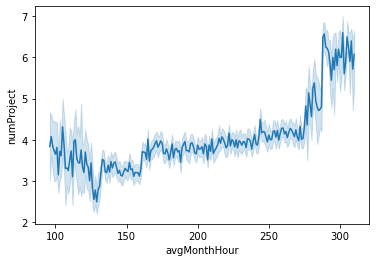

In [43]:
sns.lineplot(data=df1, x='avgMonthHour', y='numProject')


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [44]:
df1['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [45]:
df1.head()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [46]:
df1[df1['tenure'] > (df1['tenure'].std() * 4)].shape[0] 

824

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [48]:
df2 = pd.get_dummies(df1, drop_first=True)
df2

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   satisLevel        11991 non-null  float64
 1   lastEval          11991 non-null  float64
 2   numProject        11991 non-null  int64  
 3   avgMonthHour      11991 non-null  int64  
 4   tenure            11991 non-null  int64  
 5   workAccident      11991 non-null  int64  
 6   left              11991 non-null  int64  
 7   promoLast5y       11991 non-null  int64  
 8   dept_RandD        11991 non-null  uint8  
 9   dept_accounting   11991 non-null  uint8  
 10  dept_hr           11991 non-null  uint8  
 11  dept_management   11991 non-null  uint8  
 12  dept_marketing    11991 non-null  uint8  
 13  dept_product_mng  11991 non-null  uint8  
 14  dept_sales        11991 non-null  uint8  
 15  dept_support      11991 non-null  uint8  
 16  dept_technical    11991 non-null  uint8 

In [50]:
df2.corr()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,left,promoLast5y,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
satisLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,-0.027838,0.018579
lastEval,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,0.010416,-0.000755
numProject,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.000914,0.002484
avgMonthHour,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.000675,0.002065
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,-0.032541,0.016612
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,0.099113,-0.047214
promoLast5y,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,-0.076576,0.041601
dept_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.007301,0.014761
dept_accounting,-0.021056,0.007244,0.006286,0.001938,0.006910,-0.009178,0.005955,-0.001497,-0.057925,1.000000,-0.053684,-0.045397,-0.056989,-0.057569,-0.142173,-0.098892,-0.112135,-0.000955,-0.007934


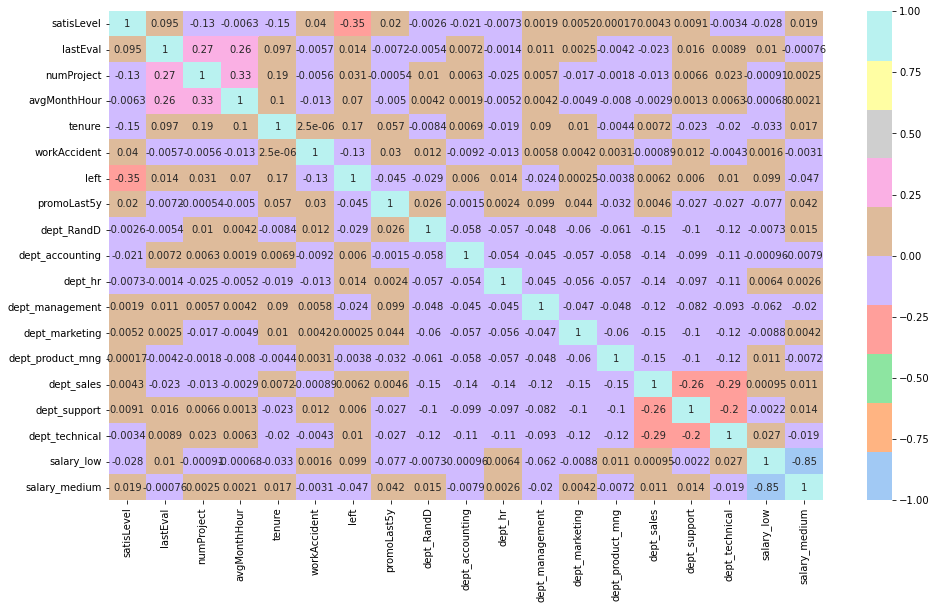

In [51]:
plt.figure(figsize=(16, 9))
sns.heatmap(df2.corr(), annot=True, cmap=sns.color_palette("pastel"), vmin=-1, vmax=1)


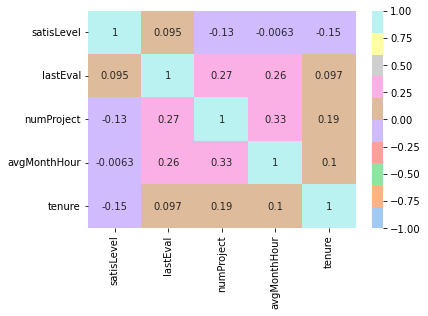

In [52]:
sns.heatmap(df2[['satisLevel', 'lastEval', 'numProject', 'avgMonthHour', 'tenure']].corr(), annot=True, cmap=sns.color_palette("pastel"), vmin=-1, vmax=1)

Insights: 
    
> 1. last evaluation score and number of projects, average monthly work hour and number of project, last evaluation score and average monthly work hour are all correlated.   

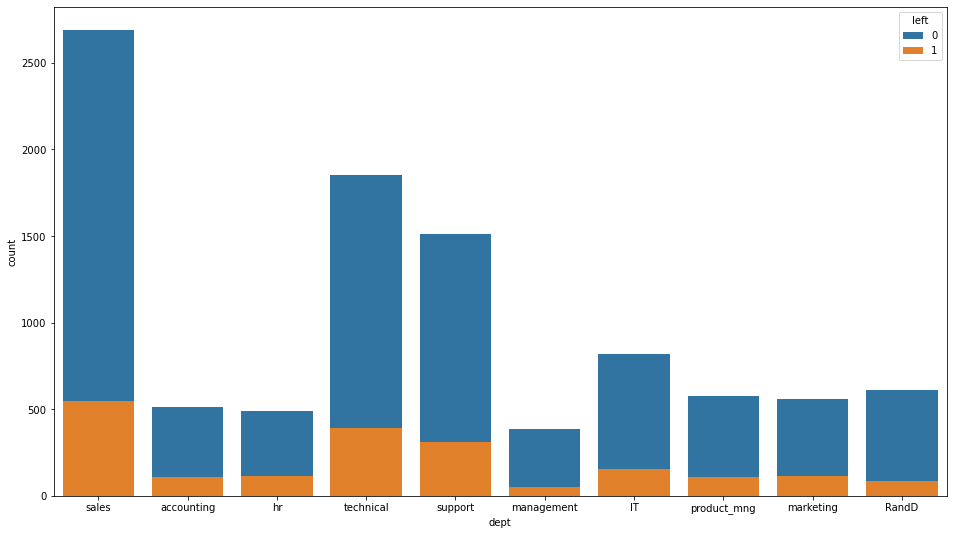

In [53]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df1, x='dept', hue='left', dodge=False)


In [54]:
df1.groupby(['dept', 'left']).size()

dept         left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
dtype: int64

In [55]:
y = df2['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [56]:
del df2['left']
df2.head()

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,promoLast5y,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
df2 = pd.DataFrame(scaler.fit_transform(df2), index=df2.index, columns=df2.columns)
df2

,satisLevel,lastEval,numProject,avgMonthHour,tenure,workAccident,promoLast5y,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.890110,0.296875,0.2,0.761682,1.000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.714286,0.921875,0.6,0.794393,1.000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11997,0.835165,0.281250,0.2,0.415888,1.000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11998,0.263736,0.453125,0.2,0.355140,1.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=0)

In [62]:
lr.fit(df2, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [63]:
### YOUR CODE HERE ###
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

accuracy_score(y_test, y_pred)

0.8474364318466028

In [65]:
recall_score(y_test, y_pred)

0.2

In [66]:
precision_score(y_test, y_pred)

0.5319148936170213

In [67]:
f1_score(y_test, y_pred)

0.29069767441860467

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
cm

array([[1958,   66],
       [ 300,   75]])

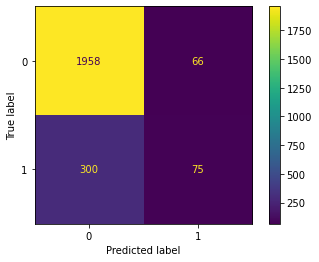

In [94]:
ConfusionMatrixDisplay(cm, display_labels=lr.classes_).plot(values_format='')

In [70]:
print(classification_report(y_test, y_pred, target_names=['predicted to stay', 'predicted to leave']))

                    precision    recall  f1-score   support

 predicted to stay       0.87      0.97      0.91      2024
predicted to leave       0.53      0.20      0.29       375

          accuracy                           0.85      2399
         macro avg       0.70      0.58      0.60      2399
      weighted avg       0.81      0.85      0.82      2399



In [71]:
# Try another model: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
dc = DecisionTreeClassifier(random_state=0)

In [73]:
cv_params = {
    'max_depth': [2, 8],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [2, 5]
}

In [74]:
dc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [75]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [76]:
dc_cv = GridSearchCV(dc, cv_params, scoring=scoring, cv=4, refit='f1')

In [77]:
dc_cv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5],
  

In [78]:
dc_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [83]:
dc_df = pd.DataFrame(dc_cv.cv_results_)
dc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_recall,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.003919,0.000687,0.005240,0.000143,2,sqrt,2,2,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.391089,...,0.865409,0.003628,5,0.644898,0.661538,0.647287,0.676692,0.657604,0.012725,5
1,0.003783,0.000288,0.005335,0.000454,2,sqrt,2,5,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.391089,...,0.865409,0.003628,5,0.644898,0.661538,0.647287,0.676692,0.657604,0.012725,5
2,0.003013,0.000183,0.004478,0.000295,2,sqrt,5,2,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.391089,...,0.865409,0.003628,5,0.644898,0.661538,0.647287,0.676692,0.657604,0.012725,5
3,0.003614,0.000475,0.005382,0.000392,2,sqrt,5,5,"{'max_depth': 2, 'max_features': 'sqrt', 'min_...",0.391089,...,0.865409,0.003628,5,0.644898,0.661538,0.647287,0.676692,0.657604,0.012725,5
4,0.005909,0.000853,0.004757,0.000588,8,sqrt,2,2,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.804455,...,0.970392,0.008871,2,0.933908,0.974860,0.943396,0.966408,0.954643,0.016610,1
5,0.005464,0.000415,0.004934,0.000344,8,sqrt,2,5,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.891089,...,0.971539,0.007321,1,0.972973,0.986301,0.952778,0.873206,0.946314,0.043864,2
6,0.006135,0.000352,0.005062,0.000433,8,sqrt,5,2,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.896040,...,0.970288,0.006765,3,0.945170,0.957672,0.944882,0.863962,0.927921,0.037286,3
7,0.005818,0.000617,0.004919,0.000520,8,sqrt,5,5,"{'max_depth': 8, 'max_features': 'sqrt', 'min_...",0.896040,...,0.970288,0.006765,3,0.945170,0.957672,0.944882,0.863962,0.927921,0.037286,3


In [79]:
dc_cv.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [80]:
dc_cv.best_score_

0.9131242651119741

In [87]:
best_results = dc_df.iloc[dc_df['mean_test_f1'].idxmax()]
best_results

mean_fit_time                                                       0.005464
std_fit_time                                                        0.000415
mean_score_time                                                     0.004934
std_score_time                                                      0.000344
param_max_depth                                                            8
param_max_features                                                      sqrt
param_min_samples_leaf                                                     2
param_min_samples_split                                                    5
params                     {'max_depth': 8, 'max_features': 'sqrt', 'min_...
split0_test_recall                                                  0.891089
split1_test_recall                                                  0.891089
split2_test_recall                                                   0.84901
split3_test_recall                                                  0.903465

In [89]:
dc_accuracy = best_results['mean_test_accuracy']
dc_precision = best_results['mean_test_precision']
dc_recall = best_results['mean_test_recall']
dc_f1 = best_results['mean_test_f1']
#dc_auc = best_results['mean_test_roc_auc']

In [92]:
dc_scores = {
    'Model': ['Decision Tree'],
    'Accuracy': [dc_accuracy],
    'Precision': [dc_precision],
    'Recall': [dc_recall],
    'F1': [dc_f1]
}

In [93]:
pd.DataFrame(dc_scores)

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.971539,0.946314,0.883663,0.913124


In [105]:
gini_df = pd.DataFrame(dc_cv.best_estimator_.feature_importances_, columns=['Gini'], index=df2.columns)
gini_df = gini_df.sort_values('Gini', ascending=False)

In [106]:
gini_df[gini_df['Gini'] > 0]

,Gini
satisLevel,0.624099
numProject,0.149279
tenure,0.095231
avgMonthHour,0.063265
lastEval,0.058794
workAccident,0.006447
dept_management,0.001065
dept_RandD,0.000432
promoLast5y,0.000395
dept_accounting,0.000353


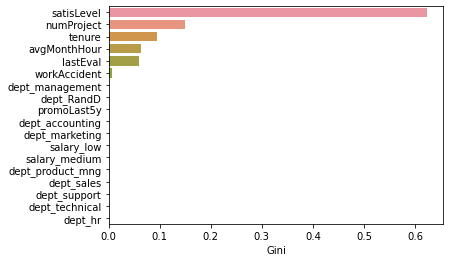

In [109]:
sns.barplot(data=gini_df, x='Gini', y=gini_df.index)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [95]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds

(array([0.       , 0.0326087, 1.       ]),
 array([0. , 0.2, 1. ]),
 array([2, 1, 0]))

In [96]:
roc_auc = auc(fpr, tpr)

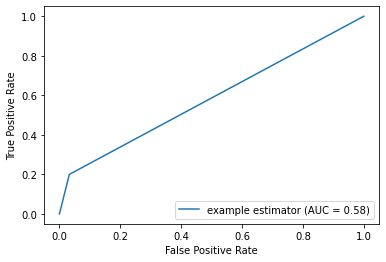

In [97]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator').plot()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.